# Prediction of The Health Outcome of The Horse
[Abstract] This is an individual project provided by <i>Walter Reade, Ashley Chow. (2023). Predict Health Outcomes of Horses. Kaggle. https://kaggle.com/competitions/playground-series-s3e22 </i> <br>
    
Classificational algorithm has been widely used in veterian and public health, apart from traditional linear and logistic regression, in modelling, classifying, and prediction. This project aims to use Tree-based classification models including `Decision Tree`, `Random Forest`, `Gradient Boosting Decision Tree`,`XGB Model`, and `Light Gradient Boosting Model`to predict the outcome of the horse based on their health data. Through importing data, Explorative Data Analysis (EDA), data cleaning, data visulization, I trained and fine-tuned `Random Forest`, `Gradient Boosting Decision Tree`,`XGB Model`, and Gradient Boost DT to classify each molecular and output the result in `test` dataset before model fine-tuning & evaluate the model performance.

**According to the kaggle leaderboard, this project Scored 0.74393 (Public score: 0.79878, which is only a dummy ranking before final result), ranking of 495/1544 (top 1/3).**

## 0. Setup environment & Import Dataset

In [30]:
# import basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [31]:
# please ensure that this ipynb file is in the same directory as spreadsheets, or
# os.chdir('the directory of the data files')
os.listdir()

['.ipynb_checkpoints',
 'Code.ipynb',
 'result.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [32]:
# open datasets
# sample = pd.read_csv(os.listdir()[2])
# train = pd.read_csv(os.listdir()[4])
# test = pd.read_csv(os.listdir()[3])

# in case the file order is changed
sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Only `train` will be used to train the data, while predicting `test` data based on their feature.

In [33]:
# basic info
train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [34]:
train.tail()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,2.0,None,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,decreased,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,increased,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,2.0,absent,distend_small,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived
1234,1234,yes,adult,528548,38.1,54.0,36.0,normal,normal,pale_pink,less_3_sec,mild_pain,absent,none,slight,none,3.0,None,distend_small,45.0,6.0,clear,3.6,yes,2124,0,0,yes,lived


In [35]:
train.shape

(1235, 29)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

<font color = '#EE0000'>Test dataset will be explored after finishing model training</font>

In [37]:
# what will we submit
sample.head()

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,lived
4,1239,lived


In [38]:
sample.tail()

,id,outcome
819,2054,lived
820,2055,lived
821,2056,lived
822,2057,lived
823,2058,lived


In [39]:
sample.shape

(824, 2)

<font color = '3399DD'>This project shall submit the predict value for `outcome` in the format above.</font>

## 1. EDA

In [40]:
# statistic values
train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [41]:
# correlational analysis: It seems that some columns are highly associated...
train.corr()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
id,1.000000,-0.011094,0.010050,-0.011398,0.010348,-0.031379,-0.019742,0.020479,0.022273,0.080642,-0.065084,-0.026604
hospital_number,-0.011094,1.000000,-0.002552,0.118391,0.085008,0.114354,-0.018028,-0.154746,0.141800,0.030844,0.022098,-0.012575
rectal_temp,0.010050,-0.002552,1.000000,0.176761,0.124377,0.115980,0.088986,-0.060842,0.043342,0.021711,-0.022823,-0.005220
pulse,-0.011398,0.118391,0.176761,1.000000,0.395130,-0.010132,0.435102,0.004373,0.056391,0.000037,0.021804,0.028273
respiratory_rate,0.010348,0.085008,0.124377,0.395130,1.000000,0.003854,0.188777,0.004018,0.004287,0.020502,-0.010536,0.009663
nasogastric_reflux_ph,-0.031379,0.114354,0.115980,-0.010132,0.003854,1.000000,-0.101066,-0.583299,0.433006,0.052951,-0.029683,-0.024594
packed_cell_volume,-0.019742,-0.018028,0.088986,0.435102,0.188777,-0.101066,1.000000,0.176178,-0.059655,-0.083784,0.050659,0.051235
total_protein,0.020479,-0.154746,-0.060842,0.004373,0.004018,-0.583299,0.176178,1.000000,-0.469784,-0.105598,0.044565,0.020635
abdomo_protein,0.022273,0.141800,0.043342,0.056391,0.004287,0.433006,-0.059655,-0.469784,1.000000,0.050051,0.002571,-0.022588
lesion_1,0.080642,0.030844,0.021711,0.000037,0.020502,0.052951,-0.083784,-0.105598,0.050051,1.000000,-0.007595,0.002761


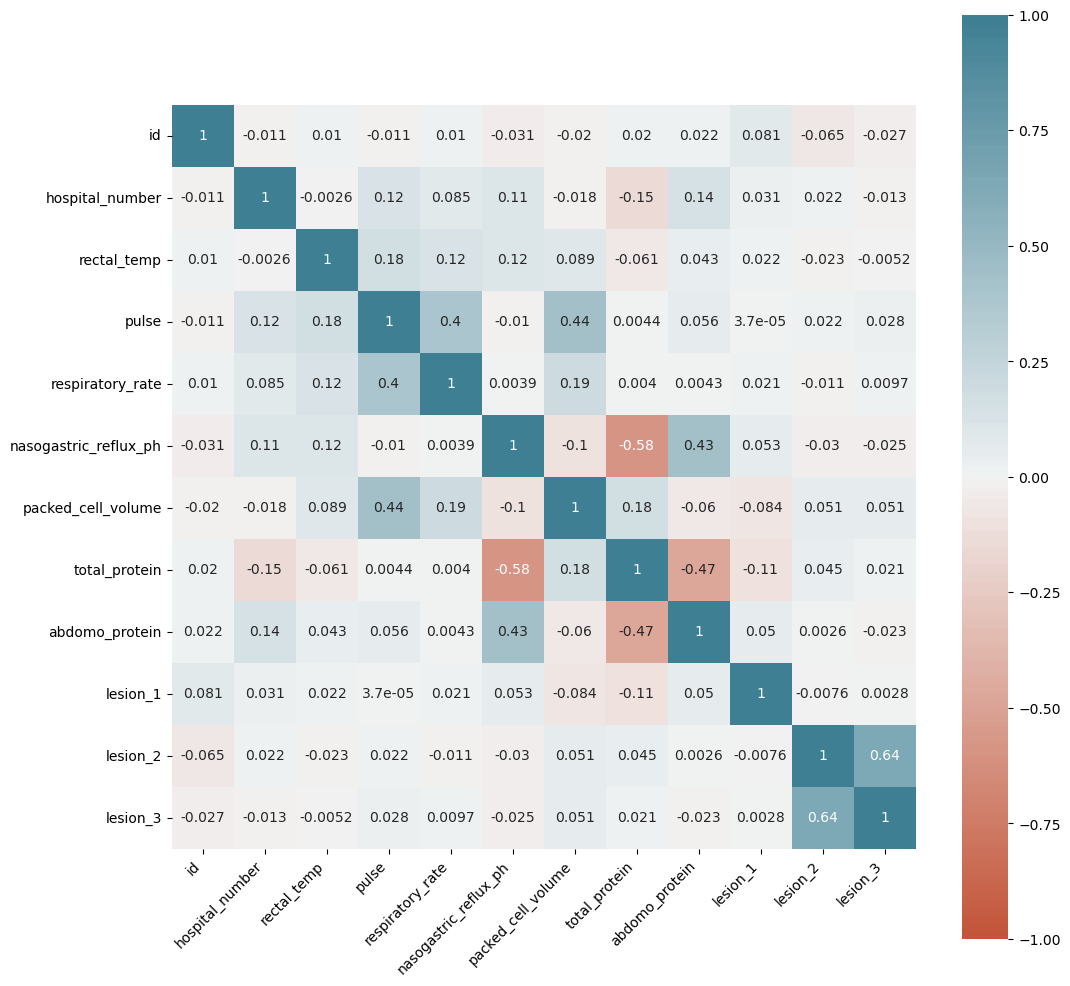

In [42]:
plt.figure(figsize = (12, 12))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

Based on the correlation matrix above, it seems that 
* `nasogastric_reflux_ph`, `total_protein`, and `abdomo_protein` are relatively intercorrelated. However, the abdominal protein has the **negative** correlation with total protein in medicine, which means we can use the `abdomo_total_protein_ratio` instead.
* Simutanously, `leision_2` and `leision_3` are highly intercorrelated. I would like to ask the specific meaning of these two in actual business case before deciding how to cope with highly correlated features. Due to their correlation are not extreamly collinearized, I shall retain both of them during the project.

In [43]:
train.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

### Describe Statistics for each variables

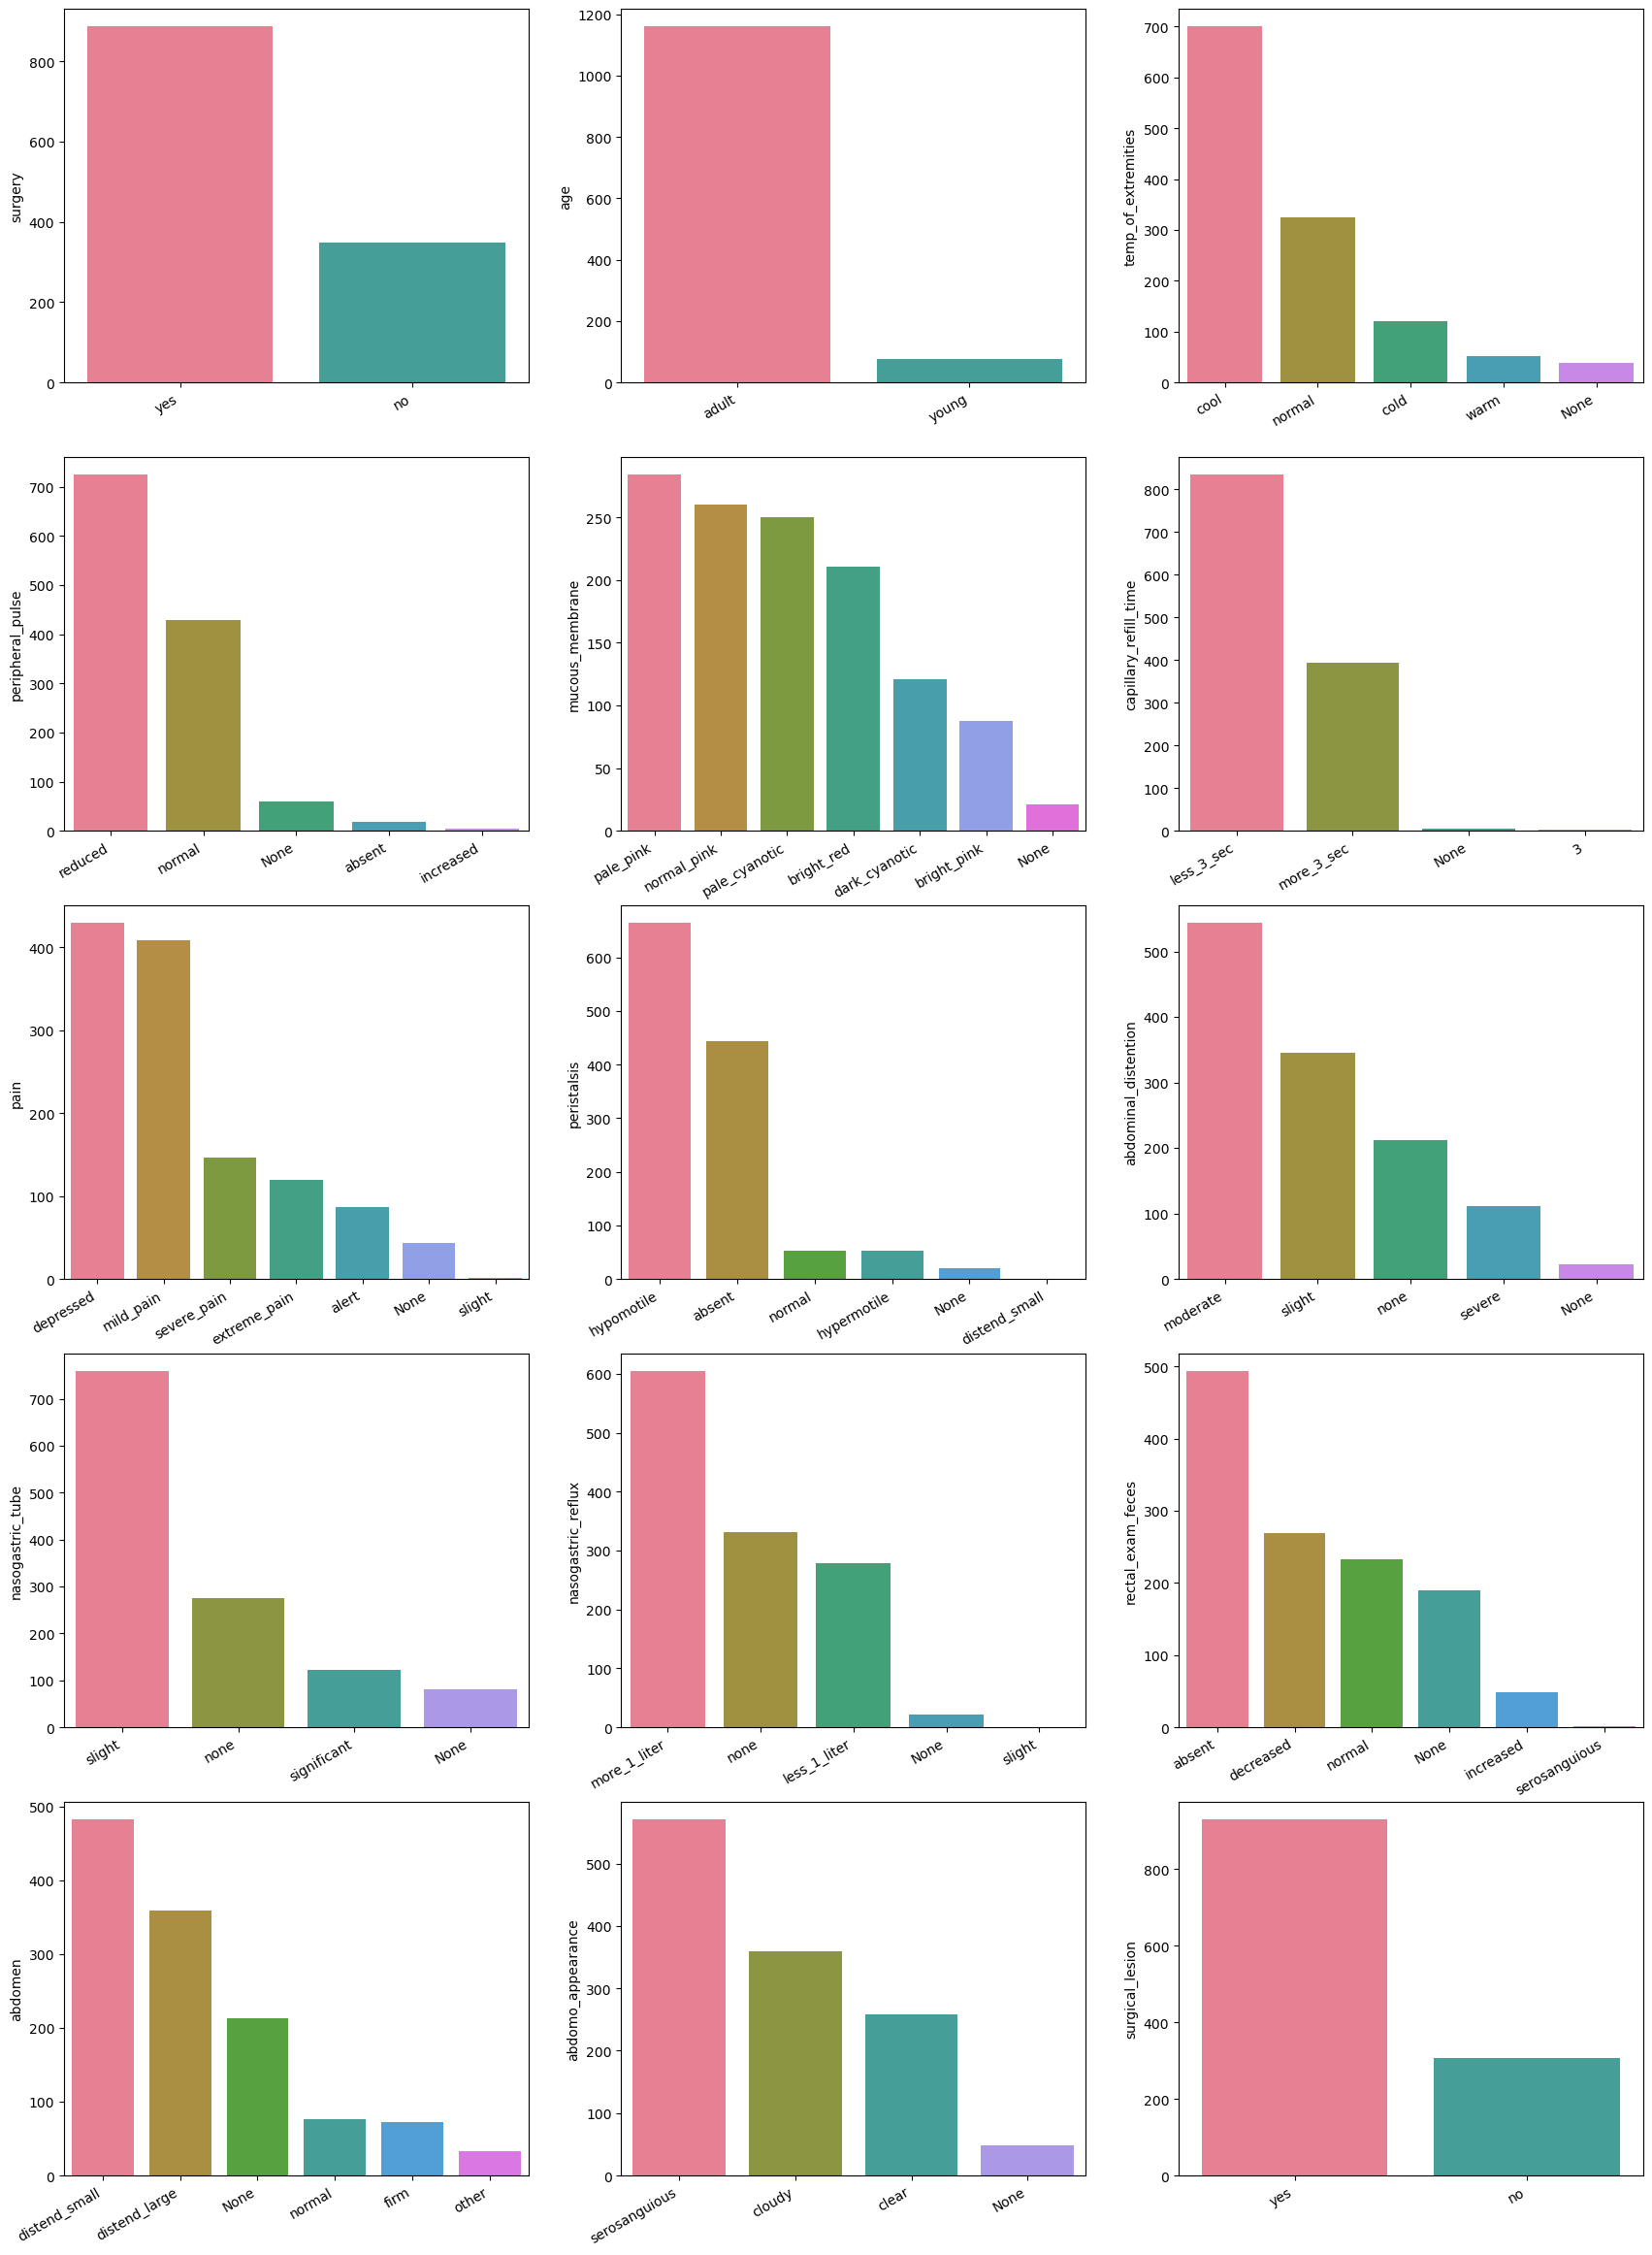

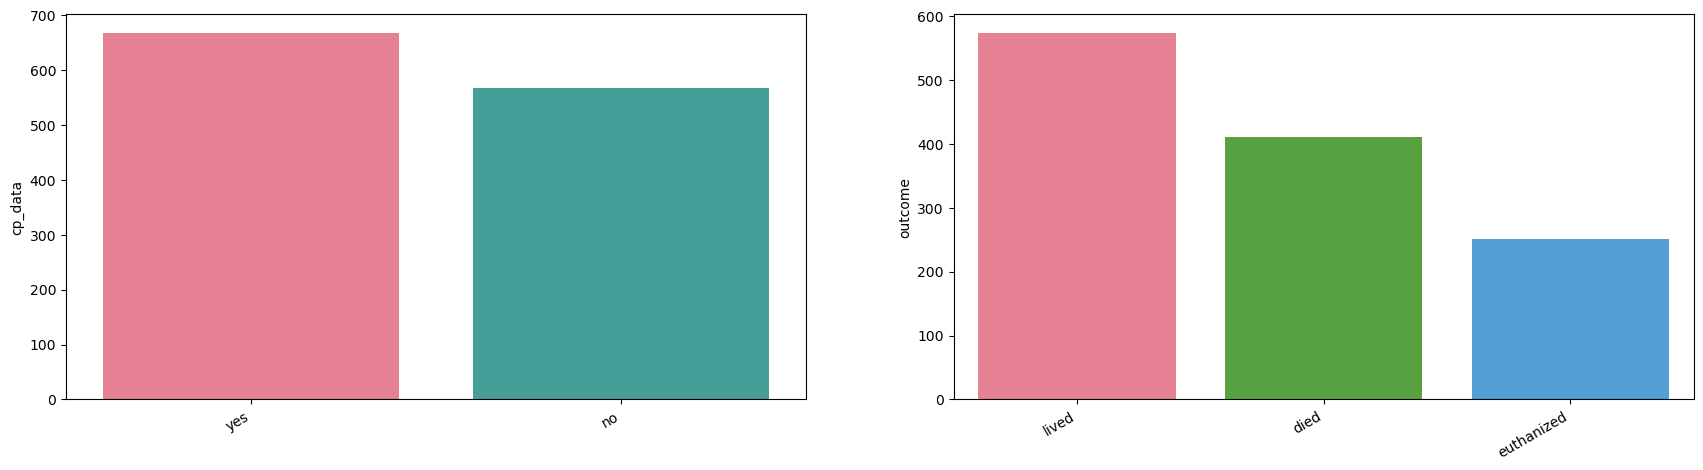

In [44]:
# Categorical Variables
cat_var = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',\
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',\
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',\
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',\
       'cp_data', 'outcome']
_ , axss = plt.subplots(5,3, figsize=[21,29]) # set canvas
_, axss_2 = plt.subplots(1,2, figsize = [21, 5])

idx = 0
for var in cat_var[:15]:
    g = sns.barplot(y = train[var].value_counts(), x = train[var].value_counts().index, palette = 'husl', 
                 ax = axss[idx // 3][idx % 3])
    g.set_xticklabels(g.get_xticklabels(), rotation = 30, horizontalalignment = 'right')
    # https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
    idx += 1
    
idx_2 = 0
for var in cat_var[15:]:
    g = sns.barplot(y = train[var].value_counts(), x = train[var].value_counts().index, palette = 'husl', 
                 ax = axss_2[idx_2])
    g.set_xticklabels(g.get_xticklabels(), rotation = 30, horizontalalignment = 'right')
    # https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
    idx_2 += 1


In [45]:
train['surgery'].value_counts()[:]

yes    887
no     348
Name: surgery, dtype: int64

In [46]:
train[train['abdomo_appearance'] == 'cloudy']['outcome'].value_counts()

lived         196
died           92
euthanized     71
Name: outcome, dtype: int64

* As we see on the grouped figure above, some of the variables distributed very unevenly.<br>
* Apart from the typo, there are some categories that needs to be merged. <br>
** `'temp_of_extremities'`: warm -> normal_or_none, None -> normal_or_none<br>
** `'peripheral_pulse'`: increased, normal -> normal_or_inreased, None -> absent<br>
** `'capillary_refill_time'`: None, more_3_sec, 3 -> no_less_3_sec<br>
** `'pain'`: None, slight -> slight_or_none<br>
** `'peristalsis'`: None -> absent, distend_small -> normal # this should be a data misplacing<br>
** `'abdominal_distention'`: None -> none<br>
** `'abdomen'`:None, other -> none_or_other<br>
** `'nasogastric_tube'`: None -> none<br>
** `'nasogastric_reflux'`None, none, slight -> none_or_slight<br>
** `'rectal_exam_feces'`: increased, serosanguious -> increased_or_serosanguious<br>
* The handling methods proposed above is loosly based on the proportion of theoutcome of each category.
* The distribution of the result category is relatively even.

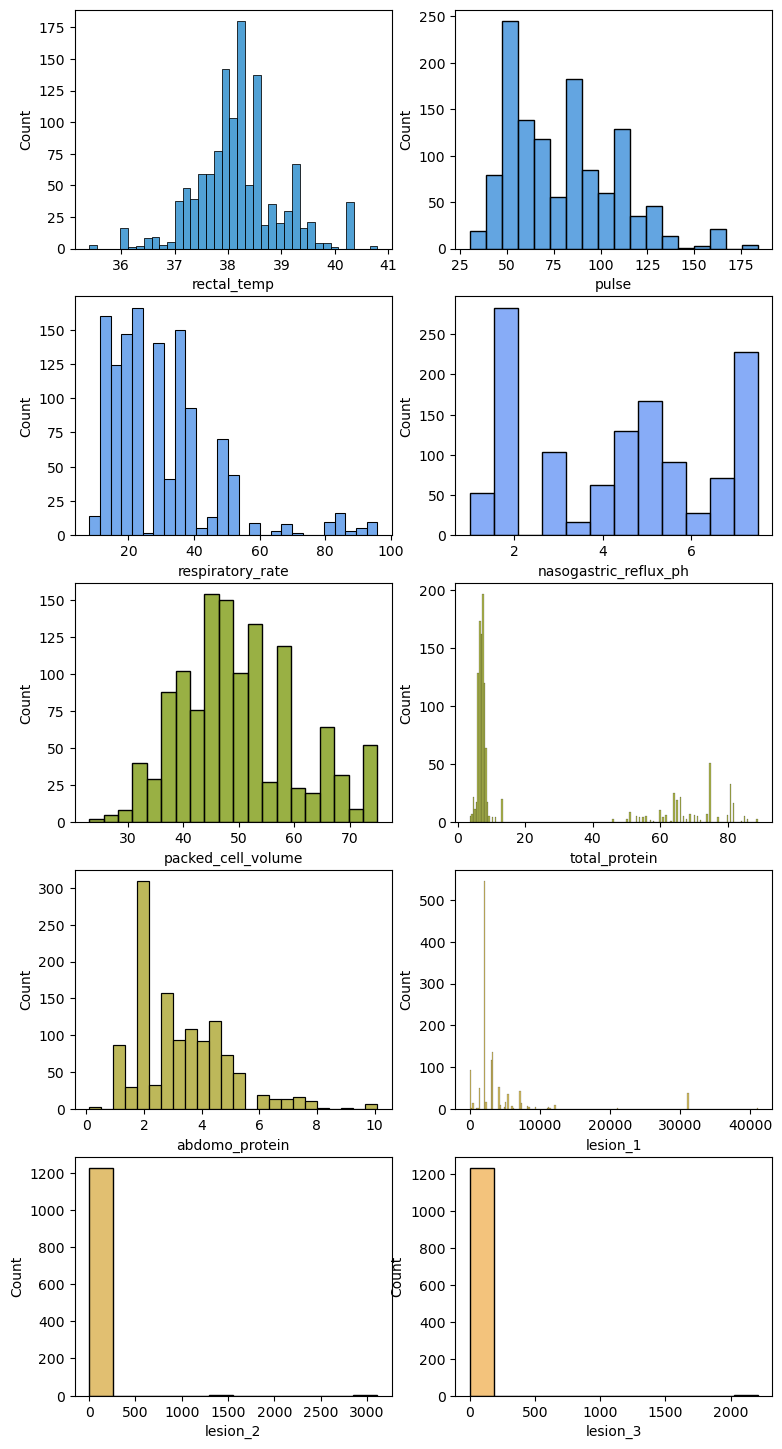

In [47]:
# continuous variable
cont_var = train.corr().columns.drop(['id', 'hospital_number'])
_, axss = plt.subplots(5, 2, figsize = [9, 18])

idx = 0
for var in cont_var:
    g = sns.histplot(train[var], \
                 color = ((23 + 24 * idx) % 255 / 255, (130 + 5 * idx) % 255 / 255, (200 + 15 * idx) % 255 / 255), \
                 ax = axss[idx // 2][idx % 2]
                )
    idx += 1

In [48]:
train.corr().columns

Index(['id', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

* Apart from `rectal_temp` and `packed_cell_volume` that are close to normal distribution, other variables are generally positively-skewed.
* seemingly, `lesion_1`, `lesion_2` and `lesion_3` have some "outliers".

In [49]:
train[train['lesion_1'] > 20000][['lesion_1', 'outcome']]

,lesion_1,outcome
15,31110,lived
75,31110,died
157,31110,lived
245,31110,lived
342,31110,died
358,31110,lived
371,31110,lived
384,31110,lived
400,31110,died
508,31110,died


In [50]:
train[train['lesion_2'] > 0]

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
43,43,yes,adult,535196,38.0,130.0,16.0,cool,reduced,pale_cyanotic,more_3_sec,severe_pain,absent,severe,slight,none,2.0,None,distend_large,52.0,65.0,serosanguious,2.0,no,3205,1400,0,no,euthanized
58,58,yes,adult,533887,38.2,88.0,24.0,cool,reduced,bright_pink,less_3_sec,depressed,absent,moderate,none,none,2.0,absent,distend_large,66.0,64.0,serosanguious,2.0,yes,4205,3111,2209,no,euthanized
76,76,no,adult,529427,37.5,88.0,24.0,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,none,None,less_1_liter,4.0,normal,None,69.0,8.2,cloudy,5.0,no,3111,3112,0,yes,lived
105,105,no,adult,5283431,38.0,54.0,24.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,less_1_liter,7.0,decreased,distend_large,41.0,7.5,clear,6.0,no,3112,3112,0,yes,lived
311,311,no,adult,534293,38.2,130.0,48.0,cold,reduced,pale_cyanotic,less_3_sec,depressed,absent,severe,none,more_1_liter,2.0,None,None,65.0,82.0,cloudy,2.0,no,2209,1400,0,yes,euthanized
523,523,yes,adult,535163,37.8,78.0,20.0,cool,reduced,pale_pink,less_3_sec,None,absent,slight,slight,more_1_liter,2.0,None,None,37.0,66.0,None,2.0,yes,2207,1400,0,no,euthanized
705,705,yes,adult,528461,38.0,112.0,44.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,moderate,slight,less_1_liter,4.4,decreased,distend_large,60.0,6.1,cloudy,2.8,yes,4205,3111,2209,yes,lived
1015,1015,yes,adult,534787,38.2,36.0,16.0,cool,normal,bright_pink,less_3_sec,depressed,normal,slight,none,more_1_liter,2.0,decreased,None,52.0,75.0,cloudy,2.0,yes,2209,1400,0,no,euthanized


In [51]:
train[train['lesion_3'] > 0]

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
58,58,yes,adult,533887,38.2,88.0,24.0,cool,reduced,bright_pink,less_3_sec,depressed,absent,moderate,none,none,2.0,absent,distend_large,66.0,64.0,serosanguious,2.0,yes,4205,3111,2209,no,euthanized
705,705,yes,adult,528461,38.0,112.0,44.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,moderate,slight,less_1_liter,4.4,decreased,distend_large,60.0,6.1,cloudy,2.8,yes,4205,3111,2209,yes,lived


* However, due to its monotonous value and very few record that they are > 0, their provision of information to out come prediction seems to be limited.
* Therefore, I shall drop both of them.

## 2. Data preprocessing

### Feature Selection & Data preprocessing

In [52]:
train = pd.read_csv('train.csv')
# in case if there's any unexpected outcome while feature processing

In [53]:
train.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [54]:
# quantified data processing

def quant_process(DataFrame):
    # drop hospital_number, lesion_2, and lesion_3
    df = DataFrame.drop(['hospital_number', 'lesion_2', 'lesion_3'], axis = 1)
    # abdomo_total_protein_ration = abdomo_protein/total_protain
    df['abdomo_total_protein_ratio'] = df['abdomo_protein'] / df['total_protein']
    df = df.drop(['abdomo_protein', 'total_protein'], axis = 1)
    return df

In [55]:
train = quant_process(train)
train.head()

,id,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,abdomo_appearance,surgical_lesion,lesion_1,cp_data,outcome,abdomo_total_protein_ratio
0,0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,serosanguious,yes,2209,no,died,0.400000
1,1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,serosanguious,yes,2208,no,euthanized,0.031250
2,2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,serosanguious,yes,5124,no,lived,0.531250
3,3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,cloudy,yes,2208,yes,lived,0.557143
4,4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,cloudy,no,0,yes,lived,0.356164


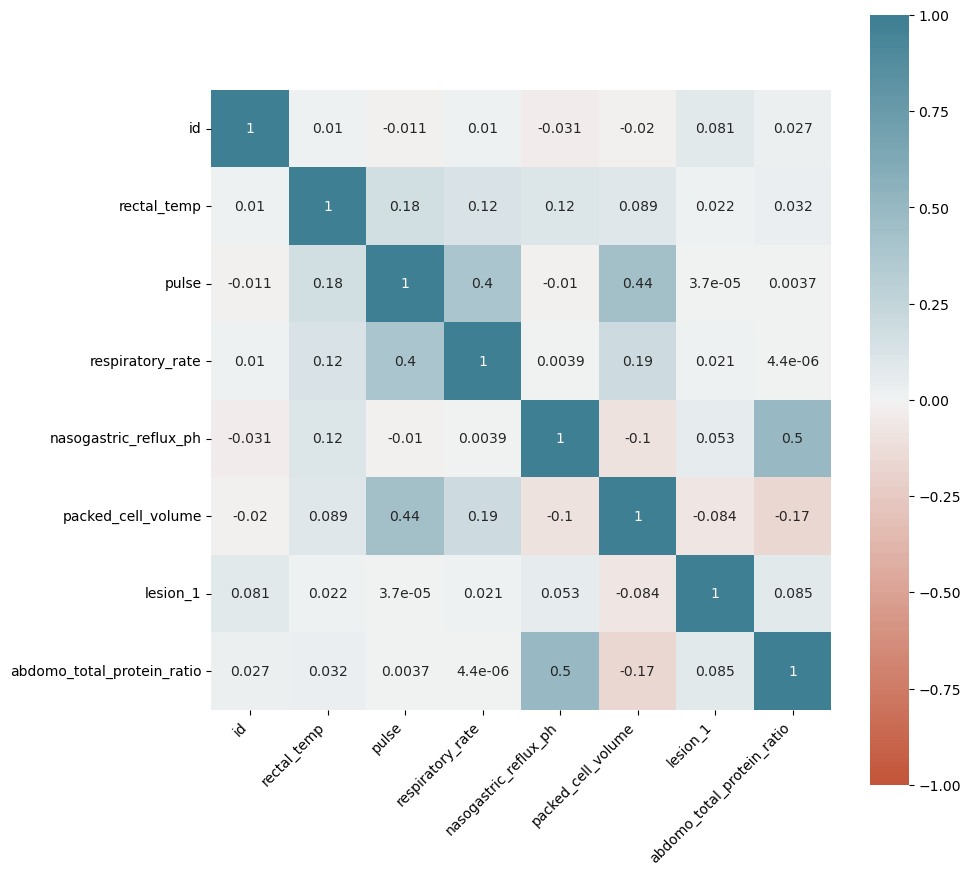

In [56]:
plt.figure(figsize = (10, 10))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

Significantly, the intercorrelation issue has been mostly effectively solved.

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1235 non-null   int64  
 1   surgery                     1235 non-null   object 
 2   age                         1235 non-null   object 
 3   rectal_temp                 1235 non-null   float64
 4   pulse                       1235 non-null   float64
 5   respiratory_rate            1235 non-null   float64
 6   temp_of_extremities         1235 non-null   object 
 7   peripheral_pulse            1235 non-null   object 
 8   mucous_membrane             1235 non-null   object 
 9   capillary_refill_time       1235 non-null   object 
 10  pain                        1235 non-null   object 
 11  peristalsis                 1235 non-null   object 
 12  abdominal_distention        1235 non-null   object 
 13  nasogastric_tube            1235 

In [58]:
# categorical value processing

def cat_processing(df):
    # `'temp_of_extremities'`: warm -> normal_or_none, None -> normal_or_none
    df['temp_of_extremities'] = df['temp_of_extremities'].replace('warm', 'normal_or_none')
    df['temp_of_extremities'] = df['temp_of_extremities'].replace('None', 'normal_or_none').replace('normal', 'normal_or_none')
    
    # `'peripheral_pulse'`: increased, normal -> normal_or_inreased, None -> absent
    df['peripheral_pulse'] = df['peripheral_pulse'].replace('increased', 'normal_or_inreased').\
    replace('normal', 'normal_or_inreased').\
    replace('None', 'absent')
    
    # `'capillary_refill_time'`: more_3_sec, None, more_3_sec, 3 -> no_less_3_sec<br>
    df['capillary_refill_time'] = df['capillary_refill_time'].replace('more_3_sec', 'no_less_3_sec').\
    replace('3', 'no_less_3_sec').\
    replace('None', 'no_less_3_sec')
    
    # `'pain'`: None, slight -> slight_or_none
    df['pain'] = df['pain'].replace('None', 'slight_or_none').replace('slight', 'slight_or_none').\
    replace('moderate', 'slight_or_none') # for test data...
    
    # `'peristalsis'`: None -> absent, distend_small -> normal # this should be a data misplacing
    df['peristalsis'] = df['peristalsis'].replace('None', 'absent').replace('distend_small', 'normal')
    
    # `'abdominal_distention'`: None -> none
    df['abdominal_distention'] = df['abdominal_distention'].replace('None', 'none')
    
    # `'abdomen'`:None, other -> none_or_other
    df['abdomen'] = df['abdomen'].replace('None', 'none_or_other').replace('other', 'none_or_other')
    
    # `'nasogastric_tube'`: None -> none
    df['nasogastric_tube'] = df['nasogastric_tube'].replace('None', 'none')
    
    # `'nasogastric_reflux'`None, none, slight -> none_or_slight
    df['nasogastric_reflux'] = df['nasogastric_reflux'].replace('None', 'none_or_slight').\
    replace('none', 'none_or_slight').replace('slight', 'none_or_slight')
    
    # `'rectal_exam_feces'`: increased, serosanguious -> increased_or_serosanguious
    df['rectal_exam_feces'] = df['rectal_exam_feces'].replace('increased', 'increased_or_serosanguious').\
    replace('serosanguious', 'increased_or_serosanguious')
    
    return df

In [59]:
train = cat_processing(train)

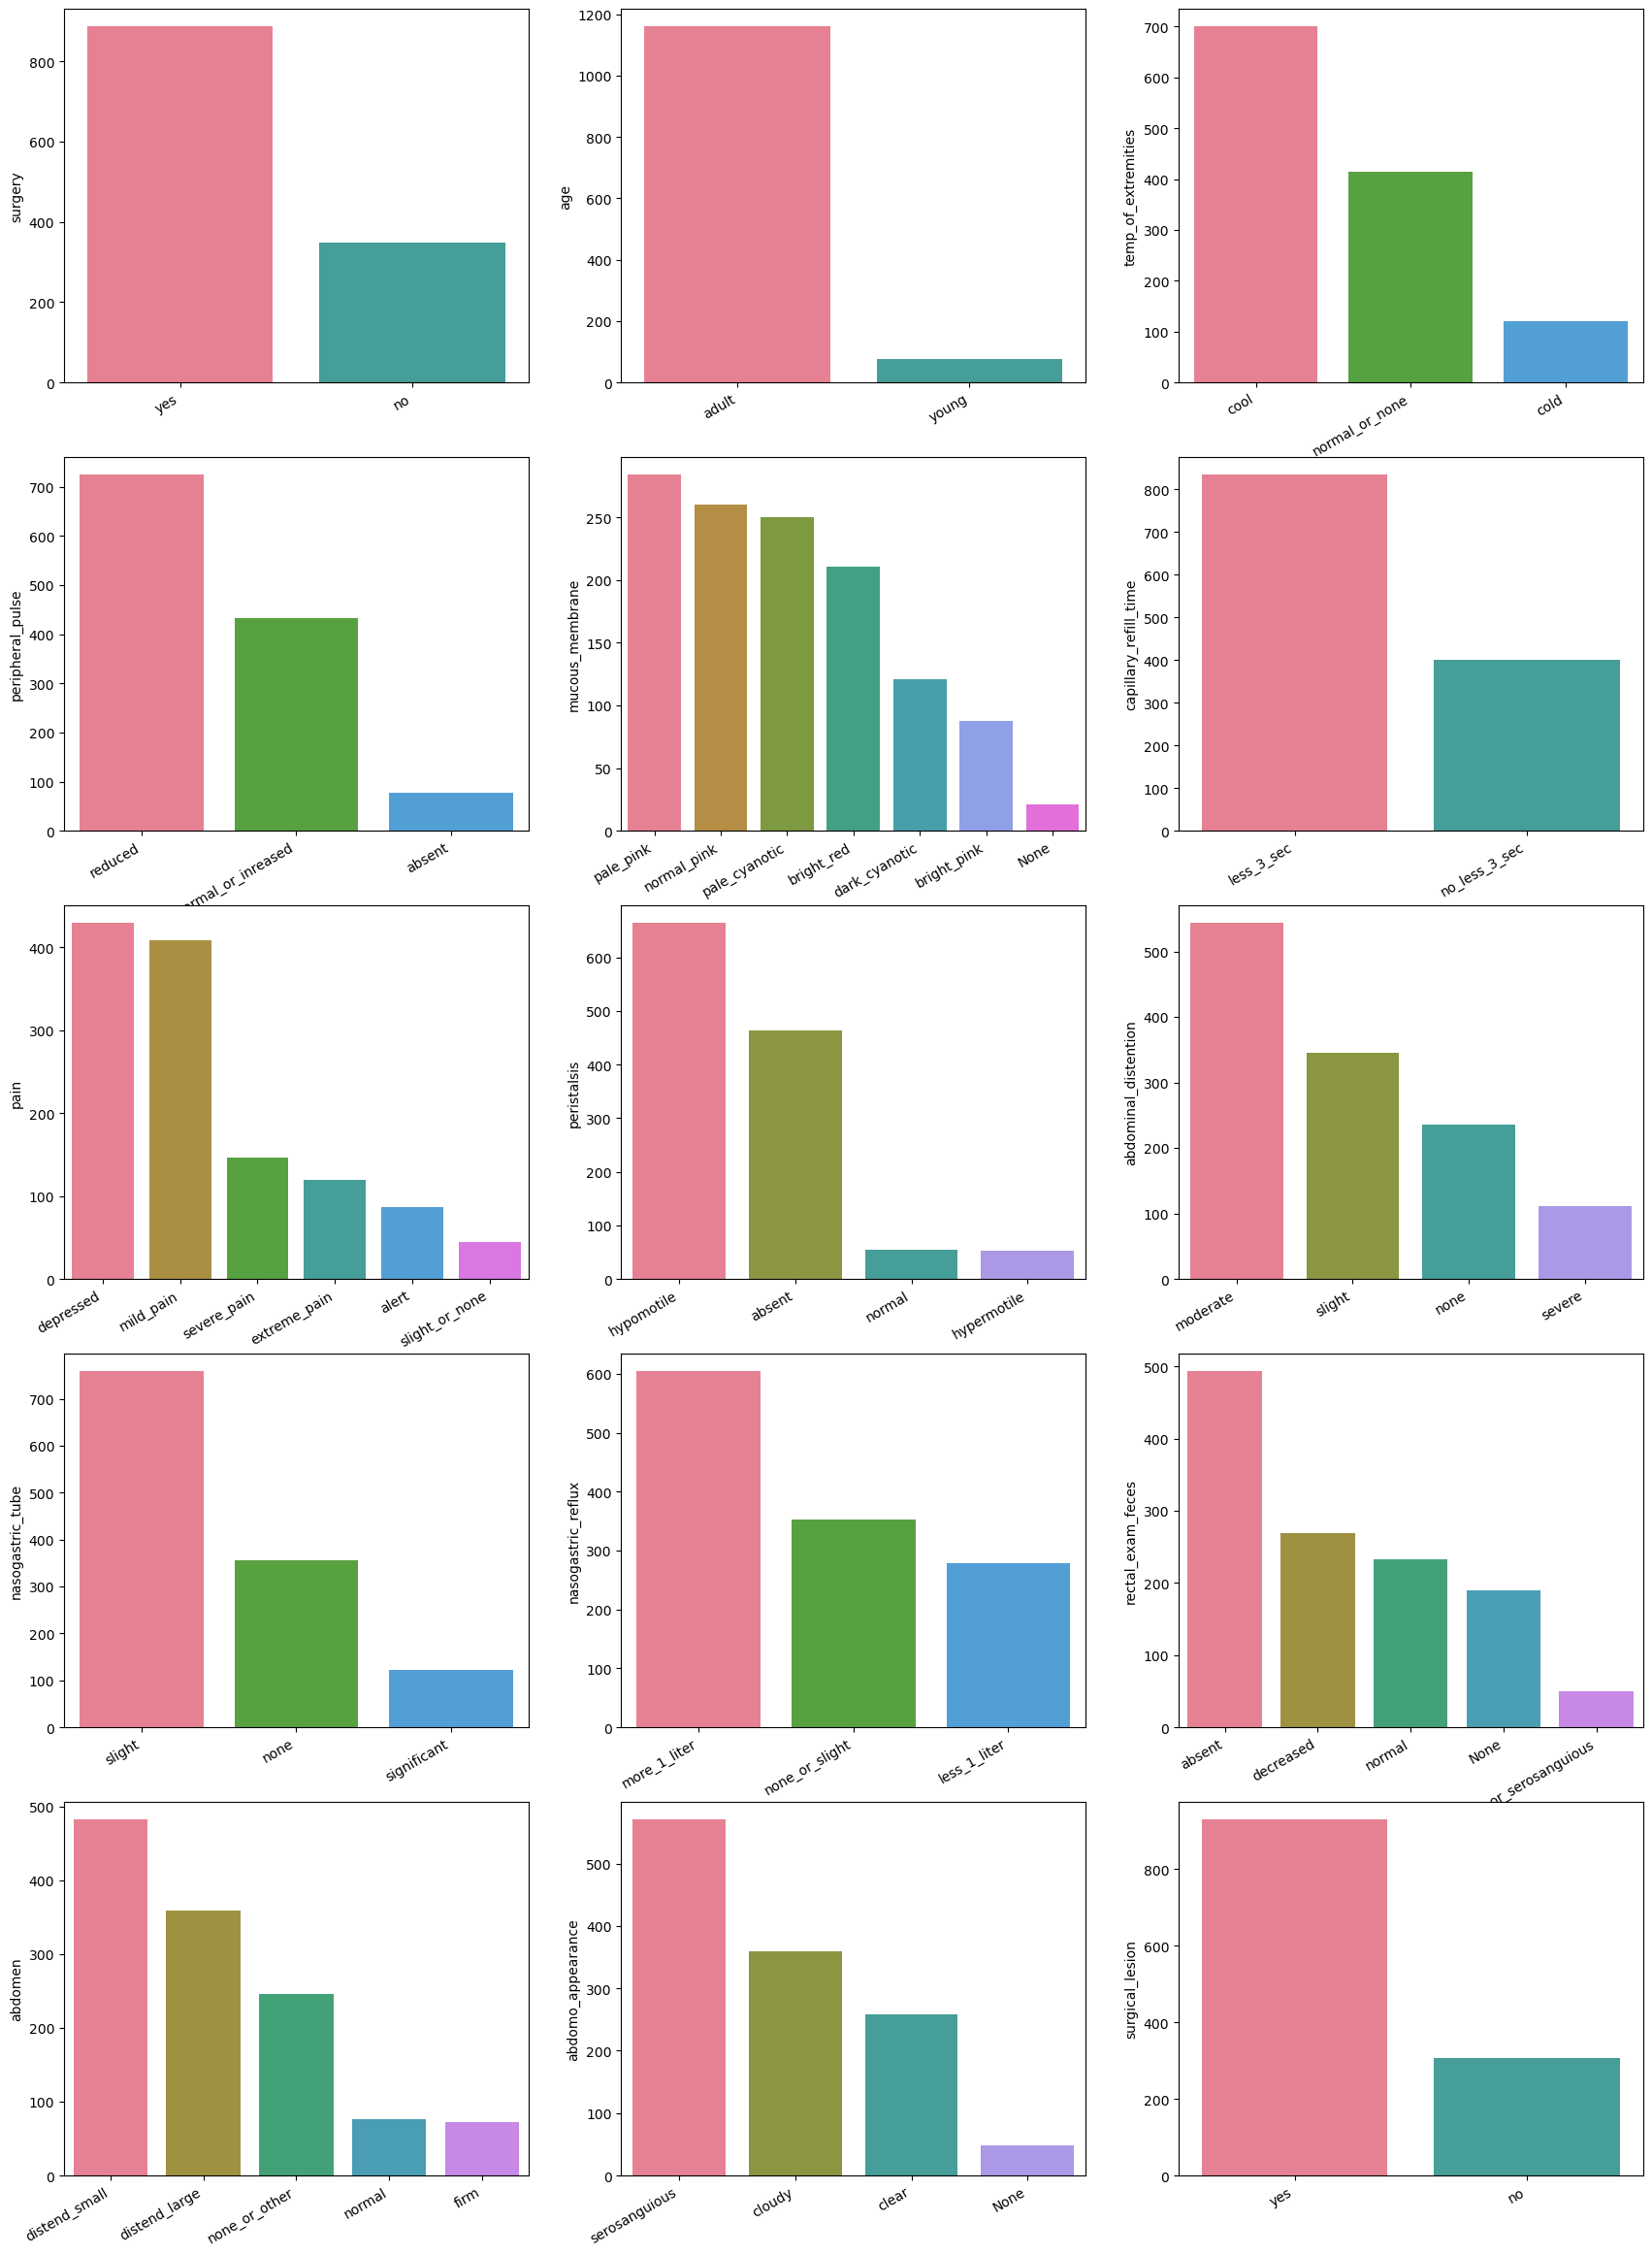

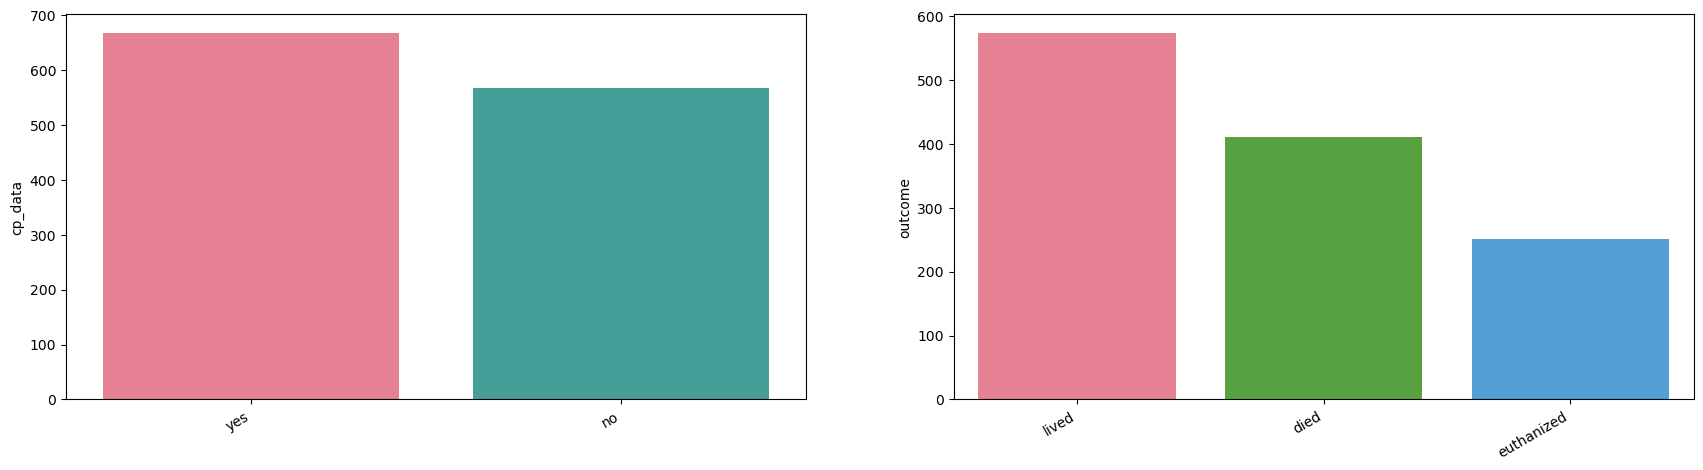

In [60]:
# Categorical Variables
cat_var = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',\
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',\
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',\
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',\
       'cp_data', 'outcome']
_ , axss = plt.subplots(5,3, figsize=[21,29]) # set canvas
_, axss_2 = plt.subplots(1,2, figsize = [21, 5])

idx = 0
for var in cat_var[:15]:
    g = sns.barplot(y = train[var].value_counts(), x = train[var].value_counts().index, palette = 'husl', 
                 ax = axss[idx // 3][idx % 3])
    g.set_xticklabels(g.get_xticklabels(), rotation = 30, horizontalalignment = 'right')
    # https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
    idx += 1
    
idx_2 = 0
for var in cat_var[15:]:
    g = sns.barplot(y = train[var].value_counts(), x = train[var].value_counts().index, palette = 'husl', 
                 ax = axss_2[idx_2])
    g.set_xticklabels(g.get_xticklabels(), rotation = 30, horizontalalignment = 'right')
    # https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
    idx_2 += 1


Generally more balanced...

### Standarize numeric variables
This, along with feature selection, may also apply to test data

In [61]:
from sklearn.preprocessing import StandardScaler

def numeric_var_proc(df):
    numeric = ['rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'lesion_1',
       'abdomo_total_protein_ratio']
    scaler = StandardScaler()
    scaler.fit(df[numeric])
    df[numeric] = scaler.transform(df[numeric])
    
    return df
    


In [62]:
train = numeric_var_proc(train)

In [63]:
train.head()

,id,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,abdomo_appearance,surgical_lesion,lesion_1,cp_data,outcome,abdomo_total_protein_ratio
0,0,yes,adult,-0.129621,1.801773,-0.368142,cool,reduced,dark_cyanotic,no_less_3_sec,depressed,absent,slight,slight,less_1_liter,1.093380,decreased,distend_small,0.702421,serosanguious,yes,-0.298737,no,died,-0.059396
1,1,yes,adult,-0.890705,0.289582,-1.097830,cool,normal_or_inreased,pale_cyanotic,no_less_3_sec,mild_pain,absent,moderate,none,more_1_liter,-1.230314,absent,distend_small,-1.576449,serosanguious,yes,-0.298921,no,euthanized,-1.283437
2,2,yes,adult,0.124074,1.389357,-0.124913,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none_or_slight,-0.455749,None,distend_large,-1.196638,serosanguious,yes,0.237648,no,lived,0.376279
3,3,yes,adult,-1.398095,-0.260306,-0.003299,cold,reduced,pale_pink,no_less_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,-1.230314,decreased,distend_small,0.322609,cloudy,yes,-0.298921,yes,lived,0.462229
4,4,no,adult,-0.256468,-0.947666,1.091232,normal_or_none,normal_or_inreased,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,1.351568,normal,normal,-0.247108,cloudy,no,-0.705212,yes,lived,-0.204906


### One-Hot Encoding for Categorical Variables

In [64]:
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

def OneHotMultiCats(df):
    categories = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',\
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',\
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',\
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',\
       'cp_data']
    
    # however, many categories are actually ordinal, which means that it would be better to use ordinal encoding instead...
    enc_ohe = OneHotEncoder()
    enc_ohe.fit(df[categories])

    df = OneHotEncoding(df, enc_ohe, categories)
    return df


In [65]:
train = OneHotMultiCats(train)

In [66]:
train.head()

,id,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,lesion_1,outcome,abdomo_total_protein_ratio,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal_or_none,peripheral_pulse_absent,peripheral_pulse_normal_or_inreased,peripheral_pulse_reduced,mucous_membrane_None,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_no_less_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight_or_none,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none_or_slight,rectal_exam_feces_None,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased_or_serosanguious,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_none_or_other,abdomen_normal,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,0,-0.129621,1.801773,-0.368142,1.093380,0.702421,-0.298737,died,-0.059396,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1,-0.890705,0.289582,-1.097830,-1.230314,-1.576449,-0.298921,euthanized,-1.283437,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2,0.124074,1.389357,-0.124913,-0.455749,-1.196638,0.237648,lived,0.376279,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,3,-1.398095,-0.260306,-0.003299,-1.230314,0.322609,-0.298921,lived,0.462229,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,-0.256468,-0.947666,1.091232,1.351568,-0.247108,-0.705212,lived,-0.204906,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [67]:
train.tail()

,id,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,lesion_1,outcome,abdomo_total_protein_ratio,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal_or_none,peripheral_pulse_absent,peripheral_pulse_normal_or_inreased,peripheral_pulse_reduced,mucous_membrane_None,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_no_less_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight_or_none,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none_or_slight,rectal_exam_feces_None,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased_or_serosanguious,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_none_or_other,abdomen_normal,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
1230,1230,0.377769,1.698669,1.091232,-1.230314,0.702421,-0.299289,lived,-1.286581,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1231,1231,-0.890705,-0.672722,1.212846,-0.713937,-1.386544,-0.298737,died,0.480012,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1232,1232,-0.890705,0.152110,0.604774,-0.713937,-0.911779,-0.631608,lived,2.551141,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1233,1233,-0.129621,-0.329042,-0.854601,-1.230314,0.797374,-0.298737,lived,-1.297455,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1234,1234,-0.129621,-0.878930,0.361545,-0.713937,-0.437014,-0.314378,lived,0.604490,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## 3. Training Preparation

In [68]:
from sklearn import model_selection

x, y = train.drop(['id', 'outcome'], axis = 1), train['outcome']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.10, stratify = y, random_state = 1)

In [69]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1111, 64) (1111,) (124, 64) (124,)


In [70]:
# y_train, y_test = y_train.astype('object'), y_test.astype('object')

## 3. Model Training

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

# This is for confusion matrix
from sklearn import metrics, model_selection 

In [73]:
# set up models
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()
model_GB = GradientBoostingClassifier()
model_GP = GaussianProcessClassifier()

For Decision Tree Classifier, the acc is 57.79   (50.07  ~ 65.51) %


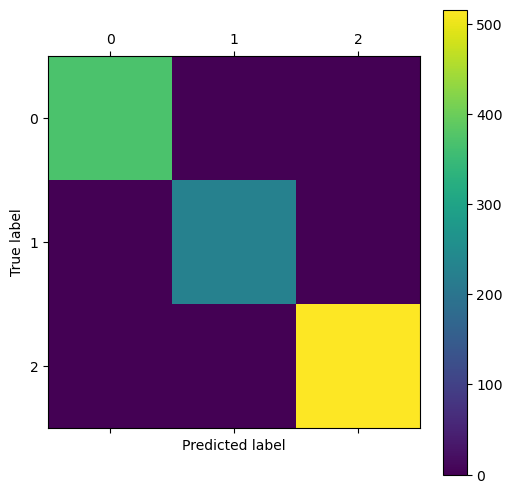

              precision    recall  f1-score   support

        died       1.00      1.00      1.00       369
  euthanized       1.00      1.00      1.00       226
       lived       1.00      1.00      1.00       516

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [74]:
# fitting model
# Decision Tree
model_DT.fit(x_train, y_train)

scores = model_selection.cross_val_score(model_DT, x_train, y_train, cv = 10)
print(f'For Decision Tree Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

y_predict = model_DT.predict(x_train) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

For Random Forest Classifier, the acc is 70.03   (64.09  ~ 75.97) %


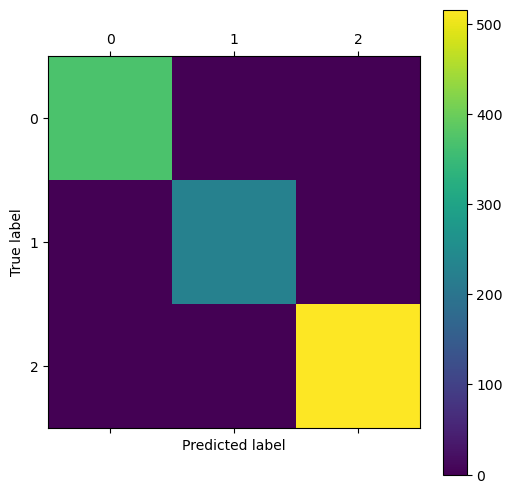

              precision    recall  f1-score   support

        died       1.00      1.00      1.00       369
  euthanized       1.00      1.00      1.00       226
       lived       1.00      1.00      1.00       516

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [75]:
# Random Forest
model_RF.fit(x_train, y_train)

scores = model_selection.cross_val_score(model_RF, x_train, y_train, cv = 10)
print(f'For Random Forest Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

y_predict = model_RF.predict(x_train) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

**<font color = 'red'>Is that data leakage? The overall acc is literally 100%...</font>**

For Gradient Boost Classifier, the acc is 68.77   (61.46  ~ 76.08) %


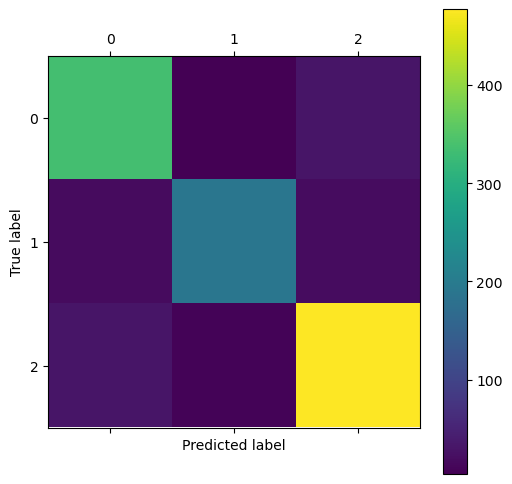

              precision    recall  f1-score   support

        died       0.87      0.91      0.89       369
  euthanized       0.94      0.84      0.89       226
       lived       0.91      0.92      0.91       516

    accuracy                           0.90      1111
   macro avg       0.91      0.89      0.90      1111
weighted avg       0.90      0.90      0.90      1111



In [76]:
# Gradient Boost Classifier
model_GB.fit(x_train, y_train)

scores = model_selection.cross_val_score(model_GB, x_train, y_train, cv = 10)
print(f'For Gradient Boost Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

y_predict = model_GB.predict(x_train) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

For Gradient Processing Classifier, the acc is 65.98   (59.64  ~ 72.32000000000001) %


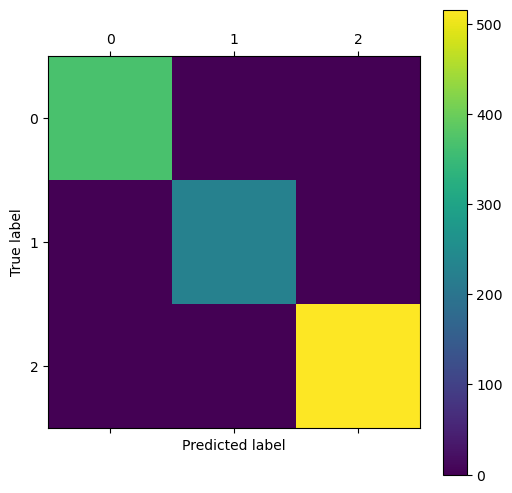

              precision    recall  f1-score   support

        died       1.00      1.00      1.00       369
  euthanized       1.00      1.00      1.00       226
       lived       1.00      1.00      1.00       516

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [77]:
# fitting model
# Gradient Processing
model_GP.fit(x_train, y_train)

scores = model_selection.cross_val_score(model_GP, x_train, y_train, cv = 10)
print(f'For Gradient Processing Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

y_predict = model_GP.predict(x_train) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_train, y_predict))

For XGB Classifier, the acc is 71.11   (63.74  ~ 78.48) %


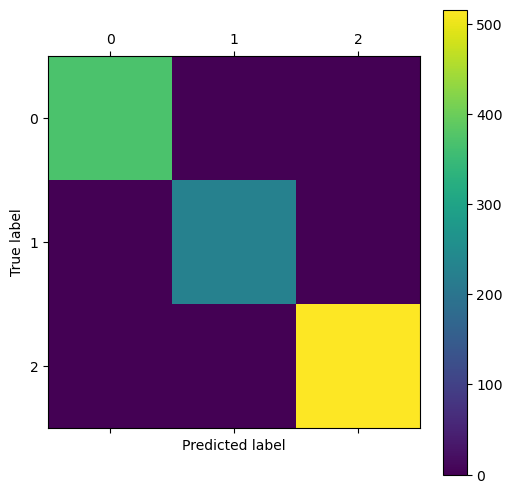

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       516

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [78]:
import xgboost as xgb

# when using xgb, encode the y labels into numbers!
def y_encoding(y):
    y = y.replace('died', 0).replace('euthanized', 1).replace('lived', 2)
    return y

y_xgb_train = y_encoding(y_train)

model_xgb = xgb.XGBClassifier(
    # colsample_bytree=0.3,
    # n_estimators = 80,\
    # max_depth = 25,\
    # learning_rate = 0.1
)
model_xgb.fit(x_train, y_xgb_train)

scores = model_selection.cross_val_score(model_xgb, x_train, y_xgb_train, cv = 10)
print(f'For XGB Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

y_predict = model_xgb.predict(x_train) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_xgb_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_xgb_train, y_predict))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 1111, number of used features: 63
[LightGBM] [Info] Start training from score -1.102219
[LightGBM] [Info] Start training from score -1.592481
[LightGBM] [Info] Start training from score -0.766909
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 63
[LightGBM] [Info] Start training from score -1.101620
[LightGBM] [Info] Start training from score -1.593549
[LightGBM] [Info] Start training from score -0.766870
[LightGBM] [Info] Auto-choosing row-wis

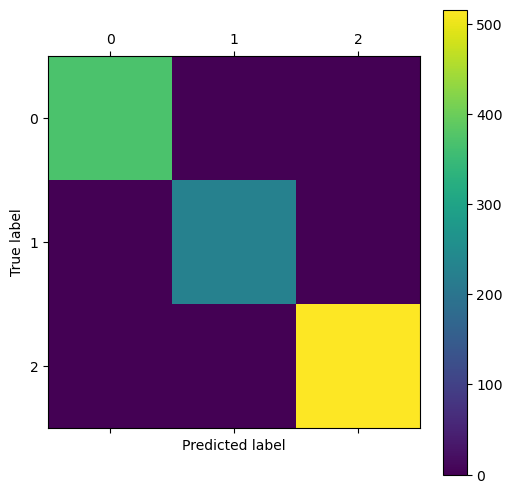

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       516

    accuracy                           1.00      1111
   macro avg       1.00      1.00      1.00      1111
weighted avg       1.00      1.00      1.00      1111



In [79]:
# !pip install lightgbm
from lightgbm import LGBMClassifier

# when using xgb, encode the y labels into numbers!
def y_encoding(y):
    y = y.replace('died', 0).replace('euthanized', 1).replace('lived', 2)
    return y

y_lgbm_train = y_encoding(y_train)

model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_lgbm_train)

scores = model_selection.cross_val_score(model_lgbm, x_train, y_lgbm_train, cv = 10)
print(f'For XGB Classifier, the acc is {round(scores.mean() * 100, 2)} \
  ({round(scores.mean() * 100 - scores.std() * 100 * 1.96, 2)}\
  ~ {round(scores.mean() * 100, 2) + round(scores.std() * 100 * 1.96, 2)}) %')

y_predict = model_lgbm.predict(x_train) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_lgbm_train, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_lgbm_train, y_predict))

It seems that `Gradient Boost Classifier` and `Random Forest`, `XGB`, `LGBM` are the most suitable model amongst them all.

## 4. Model Tuning & Testing

**For Random Forest**

In [80]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [81]:
# random forest
parameters = {
    'n_estimators' : [80, 81, 82],
    'max_depth': [9, 10, 11, 12]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'n_estimators': [80, 81, 82]})

In [568]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_RF)

# Best score: 0.714705288247889, stochastic, yet within 0.001
# max_depth:10
# n_estimators:80

Best score: 0.7047953783379792
Best parameters set:
max_depth:10
n_estimators:80


In [569]:
# best model
best_RF_model = Grid_RF.best_estimator_

In [570]:
best_RF_model.predict(x_test)

array(['lived', 'lived', 'lived', 'died', 'euthanized', 'lived',
       'euthanized', 'died', 'lived', 'died', 'lived', 'died', 'lived',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'lived', 'died', 'died', 'lived', 'euthanized',
       'euthanized', 'died', 'lived', 'lived', 'died', 'lived', 'lived',
       'died', 'lived', 'euthanized', 'euthanized', 'lived', 'died',
       'euthanized', 'lived', 'died', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'died', 'died', 'lived', 'died', 'lived', 'died',
       'lived', 'died', 'died', 'died', 'died', 'died', 'died', 'died',
       'died', 'lived', 'died', 'died', 'died', 'lived', 'lived', 'lived',
       'lived', 'euthanized', 'died', 'died', 'lived', 'died', 'died',
       'lived', 'euthanized', 'lived', 'euthanized', 'euthanized',
       'lived', 'lived', 'lived', 'died', 'lived', 'died', 'euthanized',
       'lived', 'died', 'euthanized', 'lived', 'died', 'lived',
       'eutha

In [571]:
best_RF_model.score(x_test, y_test)

0.7661290322580645

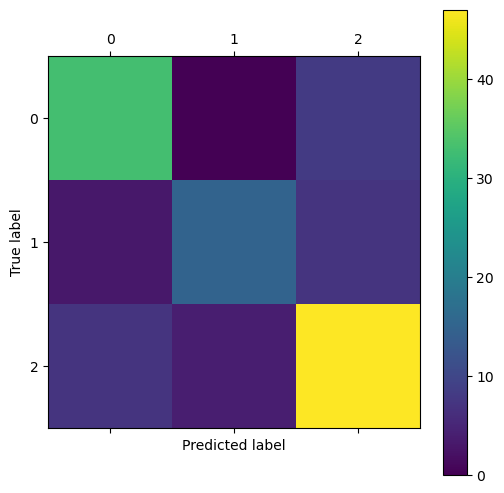

              precision    recall  f1-score   support

        died       0.77      0.80      0.79        41
  euthanized       0.79      0.60      0.68        25
       lived       0.76      0.81      0.78        58

    accuracy                           0.77       124
   macro avg       0.77      0.74      0.75       124
weighted avg       0.77      0.77      0.76       124



In [572]:
y_predict = best_RF_model.predict(x_test) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_test, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, y_predict))

In [573]:
best_RF_model.predict(x_test)
# we shall output this based on testing dataset.

array(['lived', 'lived', 'lived', 'died', 'euthanized', 'lived',
       'euthanized', 'died', 'lived', 'died', 'lived', 'died', 'lived',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'lived', 'died', 'died', 'lived', 'euthanized',
       'euthanized', 'died', 'lived', 'lived', 'died', 'lived', 'lived',
       'died', 'lived', 'euthanized', 'euthanized', 'lived', 'died',
       'euthanized', 'lived', 'died', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'died', 'died', 'lived', 'died', 'lived', 'died',
       'lived', 'died', 'died', 'died', 'died', 'died', 'died', 'died',
       'died', 'lived', 'died', 'died', 'died', 'lived', 'lived', 'lived',
       'lived', 'euthanized', 'died', 'died', 'lived', 'died', 'died',
       'lived', 'euthanized', 'lived', 'euthanized', 'euthanized',
       'lived', 'lived', 'lived', 'died', 'lived', 'died', 'euthanized',
       'lived', 'died', 'euthanized', 'lived', 'died', 'lived',
       'eutha

Therefore, for Random Forest Classifier:
<table align = 'left'>
    <tr>
        <th>Acc</th>
        <td>0.77</td>
    </tr>
    <tr>
        <th>F1 Score for Deceased</th>
        <td>0.79</td>
    </tr>
    <tr>
        <th>F1 Score for Euthanized</th>
        <td>0.68</td>
    </tr>
    <tr>
        <th>F1 Score for Survived</th>
        <td>0.78</td>
    </tr>
</table>
 


**For Gradient Boost Classifier**

In [574]:
# Gradient Boosting Classifier
parameters = {
    'n_estimators' : [78, 79, 80],
    'max_depth': [3, 6],
    'learning_rate': [0.15, 0.1]
}
Grid_GB = GridSearchCV(GradientBoostingClassifier(),parameters, cv=5)
Grid_GB.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.15, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [78, 79, 80]})

In [575]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_GB)

# Best score: 0.7074940411263281, executed again, yet result was the same
# max_depth: 3
# learning_rate: 0.1
# n_estimators: 78

Best score: 0.7074940411263281
Best parameters set:
learning_rate:0.1
max_depth:3
n_estimators:78


In [576]:
# best model
best_GB_model = Grid_GB.best_estimator_

In [577]:
best_GB_model.predict(x_test)

array(['lived', 'lived', 'lived', 'died', 'euthanized', 'lived',
       'euthanized', 'died', 'lived', 'died', 'lived', 'died', 'lived',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'lived', 'died', 'died', 'lived', 'euthanized',
       'euthanized', 'died', 'lived', 'lived', 'died', 'lived', 'lived',
       'died', 'lived', 'euthanized', 'euthanized', 'died', 'lived',
       'euthanized', 'lived', 'died', 'lived', 'lived', 'euthanized',
       'lived', 'lived', 'died', 'died', 'lived', 'died', 'lived', 'died',
       'lived', 'died', 'died', 'died', 'died', 'died', 'died', 'died',
       'died', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'lived', 'lived', 'euthanized', 'lived', 'died', 'lived', 'died',
       'died', 'lived', 'lived', 'lived', 'lived', 'euthanized', 'lived',
       'euthanized', 'lived', 'died', 'lived', 'died', 'lived',
       'euthanized', 'died', 'euthanized', 'lived', 'died', 'lived',
       'euthani

In [441]:
best_GB_model.score(x_test, y_test)

0.7741935483870968

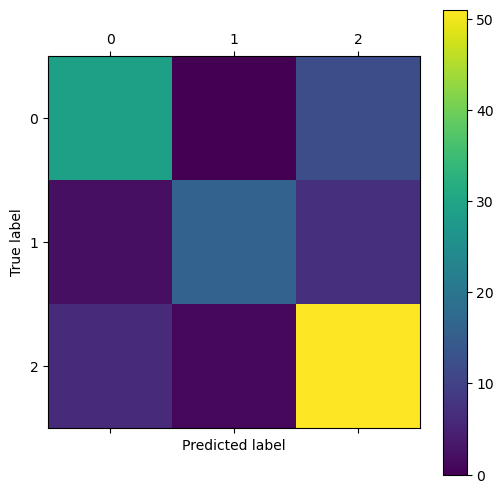

              precision    recall  f1-score   support

        died       0.78      0.71      0.74        41
  euthanized       0.94      0.64      0.76        25
       lived       0.73      0.88      0.80        58

    accuracy                           0.77       124
   macro avg       0.82      0.74      0.77       124
weighted avg       0.79      0.77      0.77       124



In [578]:
y_predict = best_GB_model.predict(x_test) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_test, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, y_predict))

In [626]:
# XGB Classifier
parameters = {
    'colsample_bytree': [0.05, 0.1, 0.15],
    'n_estimators' : [80, 82],
    'max_depth': [5],
    'learning_rate': [0.1]
}
Grid_XGB = GridSearchCV(xgb.XGBClassifier(),parameters, cv=5)
Grid_XGB.fit(x_train, y_xgb_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.05, 0.1, 0.15],
                         'learning_rate': [0.1], 'max_depth': [5],
                         'n_estimators': [80, 82]})

In [627]:
# the best hyperparameter combination
print(f'Best score: {Grid_XGB.best_estimator_.score(x_train, y_xgb_train)}')

print(f'colsample_bytree: {Grid_XGB.best_estimator_.colsample_bytree}')
print(f'n_estimators: {Grid_XGB.best_estimator_.n_estimators}')
print(f'max_depth: {Grid_XGB.best_estimator_.max_depth}')
print(f'learning_rate: {Grid_XGB.best_estimator_.learning_rate}')
# print(Grid_XGB.best_estimator_.max_depth)

# Best score: 0.8703870387038704, executed again, yet result was the same
# colsample_bytree: 0.1
# n_estimators: 80
# max_depth: 5
# learning_rate: 0.1

# ps: the test result seems to be better apart from died category when max_depth == 5!!!

Best score: 0.8703870387038704
colsample_bytree: 0.1
n_estimators: 82
max_depth: 5
learning_rate: 0.1


In [628]:
# best model
best_XGB_model = Grid_XGB.best_estimator_

In [629]:
best_XGB_model.predict(x_test)

array([2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2], dtype=int64)

In [630]:
y_xgb_test = y_encoding(y_test)
best_XGB_model.score(x_test, y_xgb_test)

0.8145161290322581

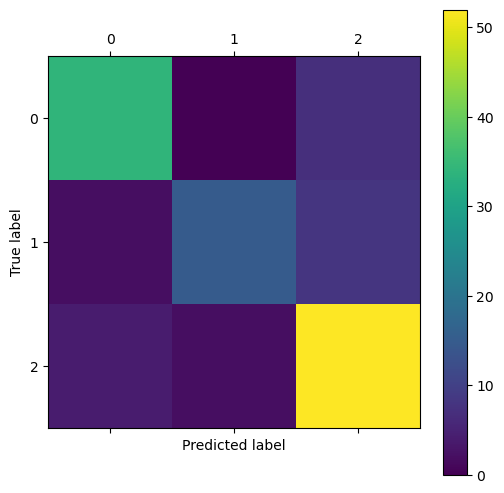

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.88      0.60      0.71        25
           2       0.78      0.90      0.83        58

    accuracy                           0.81       124
   macro avg       0.84      0.78      0.80       124
weighted avg       0.82      0.81      0.81       124



In [631]:
y_predict = best_XGB_model.predict(x_test) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_xgb_test, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_xgb_test, y_predict))

In [278]:
# lgbm
parameters = {
    'objective': ['multiclassova'],
    'boosting': ['gbdt'],
    'colsample_bytree': [0.4],
    'num_leaves': [75], 
    'n_estimators' : [141],
    'max_depth': [7],
    'learning_rate': [0.05],
    'tree_learner':['serial']
}
Grid_LGBM = GridSearchCV(LGBMClassifier(),parameters, cv=5)
Grid_LGBM.fit(x_train, y_lgbm_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 295, number of negative: 593
[LightGBM] [Info] Number of positive: 180, number of negative: 708
[LightGBM] [Info] Number of positive: 413, number of negative: 475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 888, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332207 -> initscore=-0.698219
[LightGBM] [Info] Start training from score -0.698219
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202703 -> initscore=-1.369487
[LightGBM] [Info] S

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'boosting': ['gbdt'], 'colsample_bytree': [0.4],
                         'learning_rate': [0.05], 'max_depth': [7],
                         'n_estimators': [141], 'num_leaves': [75],
                         'objective': ['multiclassova'],
                         'tree_learner': ['serial']})

In [279]:
# the best hyperparameter combination
print(f'Best score: {Grid_LGBM.best_estimator_.score(x_train, y_xgb_train)}')

print(f'boosting: {Grid_LGBM.best_estimator_.boosting}')
print(f'objective: {Grid_LGBM.best_estimator_.objective}')
print(f'num_leaves: {Grid_LGBM.best_estimator_.num_leaves}')
print(f'colsample_bytree: {Grid_LGBM.best_estimator_.colsample_bytree}')
print(f'n_estimators: {Grid_LGBM.best_estimator_.n_estimators}')
print(f'max_depth: {Grid_LGBM.best_estimator_.max_depth}')
print(f'learning_rate: {Grid_LGBM.best_estimator_.learning_rate}')
print(f'tree_learner: {Grid_LGBM.best_estimator_.tree_learner}')

# Best score: 0.9693969396939695
# boosting: gbdt
# objective: multiclassova
# num_leaves: 75
# colsample_bytree: 0.4
# n_estimators: 141
# max_depth: 7
# learning_rate: 0.05
# tree_learner: serial

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Best score: 0.9693969396939695
boosting: gbdt
objective: multiclassova
num_leaves: 75
colsample_bytree: 0.4
n_estimators: 141
max_depth: 7
learning_rate: 0.05
tree_learner: serial


In [280]:
# best model
best_LGBM_model = Grid_LGBM.best_estimator_

In [281]:
best_LGBM_model.predict(x_test)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


array([2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2], dtype=int64)

In [282]:
y_lgbm_test = y_encoding(y_test)
best_LGBM_model.score(x_test, y_lgbm_test)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


0.8225806451612904

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


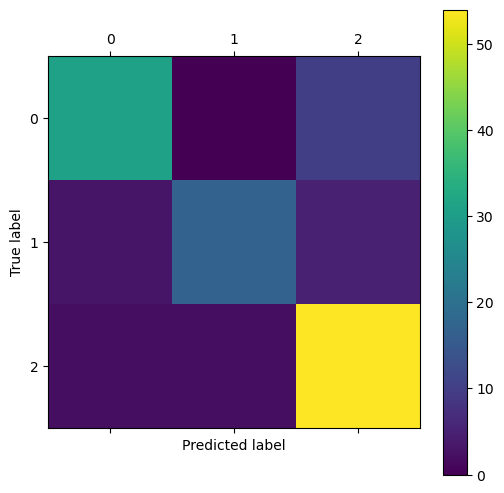

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.89      0.68      0.77        25
           2       0.78      0.93      0.85        58

    accuracy                           0.82       124
   macro avg       0.85      0.79      0.81       124
weighted avg       0.83      0.82      0.82       124



In [283]:
y_predict = best_LGBM_model.predict(x_test) # predict results

# Confusion Matrix

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_lgbm_test, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_lgbm_test, y_predict))

Therefore, for The Two Models Above:
<table align = 'left'>
    <tr>
        <th></th>
        <th>Random Forest</th>
        <th>Gradient Boosting DT</th>
        <th>XGB DT</th>
        <th>LGBM Regressor</th>
    </tr>
    <tr>
        <th>Acc</th>
        <td>0.766</td>
        <td>0.774</td>
        <td>0.815</td>
        <td>0.823</td>
    </tr>
    <tr>
        <th>F1 Score for Deceased</th>
        <td>0.79</td>
        <td>0.74</td>
        <td>0.84</td>
        <td>0.81</td>
    </tr>
    <tr>
        <th>F1 Score for Euthanized</th>
        <td>0.68</td>
        <td>0.76</td>
        <td>0.71</td>
        <td>0.77</td>
    </tr>
    <tr>
        <th>F1 Score for Survived</th>
        <td>0.78</td>
        <td>0.80</td>
        <td>0.83</td>
        <td>0.85</td>
    </tr>
</table>
 


So I choose the optimized Gradient Boosting DT to output the result.

### Extra: By Deep Neural Network (DNN)

In [180]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=64, activation='gelu'))
model.add(Dense(128, activation='gelu'))
model.add(Dense(128, activation='gelu'))
model.add(Dense(64, activation='selu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))


model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [181]:
one_hot = pd.get_dummies(y_train)
one_hot

,died,euthanized,lived
389,0,1,0
911,0,0,1
1176,1,0,0
882,0,0,1
754,0,0,1
...,...,...,...
800,0,1,0
986,0,1,0
1189,0,0,1
1045,1,0,0


In [182]:
history = model.fit(x_train, one_hot, epochs=60, batch_size=64)

Epoch 1/60
18/18 [==============================] - 1s 2ms/step - loss: 1.0337 - accuracy: 0.4806
Epoch 2/60
18/18 [==============================] - 0s 2ms/step - loss: 0.8389 - accuracy: 0.6274
Epoch 3/60
18/18 [==============================] - 0s 2ms/step - loss: 0.7658 - accuracy: 0.6778
Epoch 4/60
18/18 [==============================] - 0s 2ms/step - loss: 0.7191 - accuracy: 0.6985
Epoch 5/60
18/18 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.7156
Epoch 6/60
18/18 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.7255
Epoch 7/60
18/18 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.7426
Epoch 8/60
18/18 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7525
Epoch 9/60
18/18 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7615
Epoch 10/60
18/18 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7696
Epoch 11/60
18/18 [

In [183]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)
y_predict

4/4 [==============================] - 0s 1ms/step


array([2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2], dtype=int64)

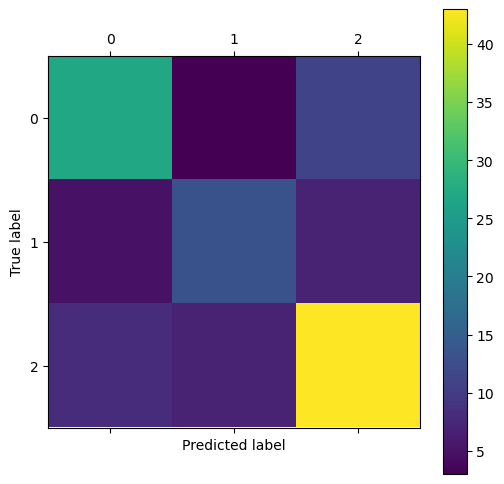

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        41
           1       0.57      0.52      0.54        25
           2       0.70      0.74      0.72        58

    accuracy                           0.67       124
   macro avg       0.65      0.64      0.64       124
weighted avg       0.67      0.67      0.67       124



In [184]:
y_test_nn = y_encoding(y_test)
cm = metrics.confusion_matrix(y_test_nn, y_predict)

plt.rcParams['figure.figsize'] = 10, 6
cm = metrics.confusion_matrix(y_test_nn, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test_nn, y_predict))

In [178]:
y_test_nn

419    2
570    2
848    2
927    0
662    1
      ..
737    2
451    2
638    1
277    2
640    2
Name: outcome, Length: 124, dtype: int64

## 5. Result Output & Storage

In [284]:
test = pd.read_csv('test.csv')

In [285]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     824 non-null    int64  
 1   surgery                824 non-null    object 
 2   age                    824 non-null    object 
 3   hospital_number        824 non-null    int64  
 4   rectal_temp            824 non-null    float64
 5   pulse                  824 non-null    float64
 6   respiratory_rate       824 non-null    float64
 7   temp_of_extremities    824 non-null    object 
 8   peripheral_pulse       824 non-null    object 
 9   mucous_membrane        824 non-null    object 
 10  capillary_refill_time  824 non-null    object 
 11  pain                   824 non-null    object 
 12  peristalsis            824 non-null    object 
 13  abdominal_distention   824 non-null    object 
 14  nasogastric_tube       824 non-null    object 
 15  nasoga

No nulls, feature therein exactly the same as training but EC1 to EC6 (result labels), which we have to output by ourselves.

In [286]:
# preprocess test data
test = quant_process(test)

# merge potentially inbalanced data
test = cat_processing(test)

# standarization of continuous var
test = numeric_var_proc(test)

# one-hot encoding
test = OneHotMultiCats(test)


In [287]:
test.head()

,id,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,lesion_1,abdomo_total_protein_ratio,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal_or_none,peripheral_pulse_absent,peripheral_pulse_normal_or_inreased,peripheral_pulse_reduced,mucous_membrane_None,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_no_less_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight_or_none,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none_or_slight,rectal_exam_feces_None,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased_or_serosanguious,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_none_or_other,abdomen_normal,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,1235,0.452957,-1.380223,-0.615318,1.323635,-0.676320,-0.726013,-0.412073,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1236,-0.056755,1.090013,0.991907,-0.535772,-0.484819,-0.293905,0.034869,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1237,-0.693895,-0.488193,-1.074525,-0.801402,-1.681702,-0.294492,-0.553212,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1238,-1.458462,0.266601,-0.615318,-1.332661,2.483451,-0.452032,-1.450581,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1239,0.070673,-1.037135,-1.074525,-0.801402,-1.155073,-0.293905,-0.145015,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [288]:
test.shape

(824, 65)

In [289]:
# perform prediction on this test dataset
test['outcome'] = best_LGBM_model.predict(test.drop(['id'], axis = 1))  # excluding ID & outcome, but should be correspond to the corresponding ID, U know.

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


In [290]:
test.head()
# Assure that the EC1 predictive proba is on this table.

,id,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,lesion_1,abdomo_total_protein_ratio,surgery_no,surgery_yes,age_adult,age_young,temp_of_extremities_cold,temp_of_extremities_cool,temp_of_extremities_normal_or_none,peripheral_pulse_absent,peripheral_pulse_normal_or_inreased,peripheral_pulse_reduced,mucous_membrane_None,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_no_less_3_sec,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight_or_none,peristalsis_absent,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_moderate,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_none,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_less_1_liter,nasogastric_reflux_more_1_liter,nasogastric_reflux_none_or_slight,rectal_exam_feces_None,rectal_exam_feces_absent,rectal_exam_feces_decreased,rectal_exam_feces_increased_or_serosanguious,rectal_exam_feces_normal,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_none_or_other,abdomen_normal,abdomo_appearance_None,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes,outcome
0,1235,0.452957,-1.380223,-0.615318,1.323635,-0.676320,-0.726013,-0.412073,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
1,1236,-0.056755,1.090013,0.991907,-0.535772,-0.484819,-0.293905,0.034869,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
2,1237,-0.693895,-0.488193,-1.074525,-0.801402,-1.681702,-0.294492,-0.553212,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2
3,1238,-1.458462,0.266601,-0.615318,-1.332661,2.483451,-0.452032,-1.450581,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
4,1239,0.070673,-1.037135,-1.074525,-0.801402,-1.155073,-0.293905,-0.145015,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2


In [291]:
# decoding test data
test['outcome'] = test['outcome'].replace(0, 'died').replace(1, 'euthanized').replace(2, 'lived')

In [292]:
test['outcome']

0           lived
1            died
2           lived
3      euthanized
4           lived
          ...    
819          died
820    euthanized
821          died
822         lived
823         lived
Name: outcome, Length: 824, dtype: object

In [753]:
# pd.Series(best_LGBM_model.predict(test.drop(['id', 'outcome'], axis = 1))).replace(0, 'died').replace(1, 'euthanized').replace(2, 'lived')

In [293]:
res = test[['id', 'outcome']]
res.to_csv('result.csv', index = False)

## 6. Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

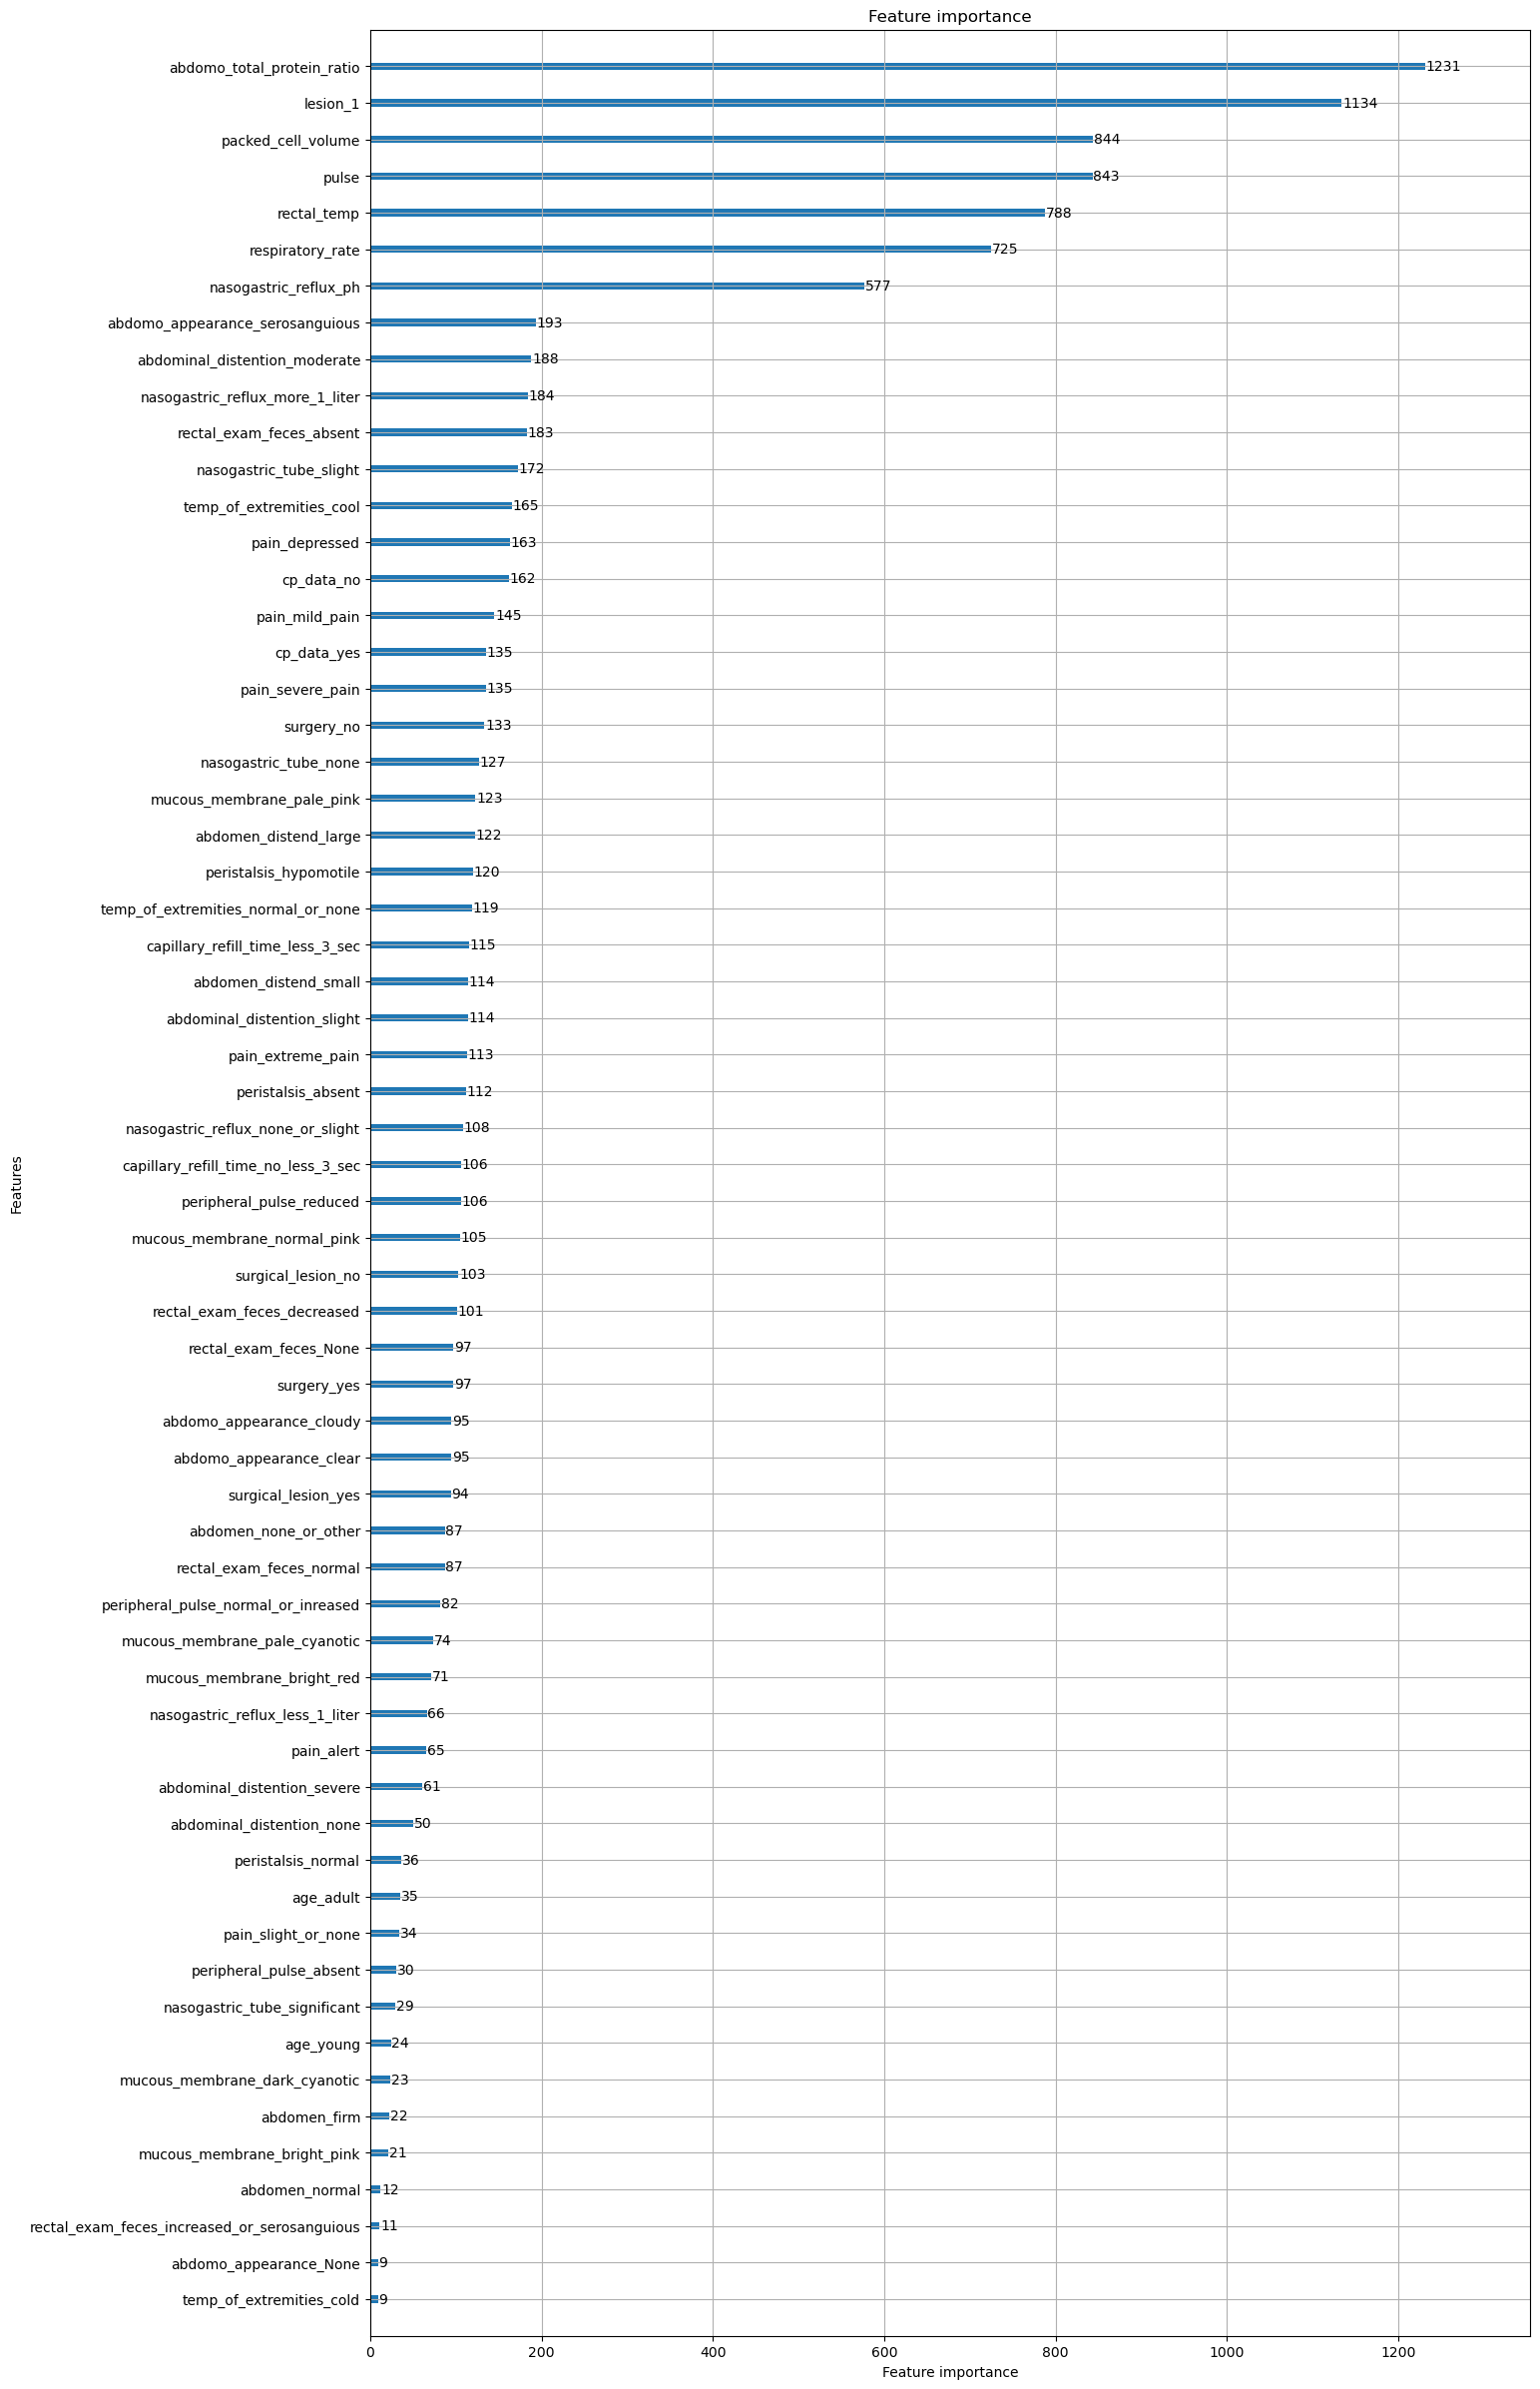

In [294]:
import lightgbm
plt.rcParams['figure.figsize'] = 15, 30
# https://snyk.io/advisor/python/lightgbm/functions/lightgbm.plot_importance
lightgbm.plot_importance(best_LGBM_model)


# Conclusions

It seems that LGBM model is the most suitable one for predicting the outcome of the horse prognosis. The `Abdominal-Total Protein Rati`o seems to be more deterministic to their prognosis, along with size of the `lesion_1`, `packed cell volumne`, `pulse`, `rectal temperature`, `respiratory rate`, and the `pH of nasogastric reflux`.